In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import h5py as h5
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding, Dropout, Activation, Reshape
#from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [ ]:
dataset = pd.read_csv('sample_data/data_CKD_bigdata_refined.csv')


In [ ]:
dataset.head()

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038,2
1,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197,1
2,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640,1
3,1,11,48,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730,2
4,1,11,30,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492,1


In [ ]:
dataset.shape

(1000000, 29)

In [ ]:
dataset.isnull().sum()

sex                      0
age                      0
sido                     0
height                   0
weight                   0
waist                    0
vision_left              0
vision_right             0
listen_left              0
listen_right             0
BP_HIGH                  0
BP_LWST                  0
BLDS                     0
TOT_CHOLE                0
TRIGLYCERIDE             0
HDL_CHOLE                0
LDL_CHOLE                0
HMG                      0
OLIG_PROTE_CD            0
CREATININE               0
SGOT_AST                 0
SGPT_ALT                 0
GAMMA_GTP                0
SMK_STAT_TYPE_RSPS_CD    0
DRINK_OR_NOT             0
MOUTH_CHECK              0
BMI                      0
GFR                      0
stage                    0
dtype: int64

In [ ]:
dataset.iloc[:,:-1]

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR
0,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038
1,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197
2,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640
3,1,11,48,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730
4,1,11,30,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,10,48,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,88.0,198.0,132.0,46.0,125.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0.0,0,26.122449,83.237802
999996,1,8,41,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,83.0,133.0,45.0,40.0,84.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0,25.951557,77.836416
999997,2,9,26,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,90.0,205.0,157.0,96.0,77.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1.0,0,20.811655,81.542158
999998,1,6,29,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,69.0,122.0,53.0,38.0,73.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0.0,0,19.591837,118.695643


In [ ]:
dataset.iloc[:,-1]

0         2
1         1
2         1
3         2
4         1
         ..
999995    2
999996    2
999997    2
999998    1
999999    1
Name: stage, Length: 1000000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import keras.layers
from tensorflow.keras.utils import to_categorical

# Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values
# # new_y = np.asarray(y)
# # (unique,counts) = np.unique(new_y,return_counts =True)
# # print(unique)
# # print(counts)
# # print(new_y.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 2)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# y_train = to_categorical(y_train,dtype="uint8")
# #print(y_train_new.shape)
# y_test = to_categorical(y_test,dtype ="uint8")
# print(y_test.shape)

# print(X_train.shape)
# print(X_test.shape)

In [ ]:
X = dataset.drop('stage',axis='columns')
y = dataset['stage']

In [ ]:
y.value_counts()

2    486184
1    475386
3     36377
5      1027
4      1026
Name: stage, dtype: int64

In [2]:
#Let us try some sampling technique to remove class imbalance
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

# print(X_sm.shape, y_sm.shape)

AttributeError: ignored

In [ ]:
y_sm.value_counts()

AttributeError: ignored

In [1]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state = 15,stratify = y_sm)

NameError: ignored

In [ ]:
y_train.value_counts()

In [ ]:
y_sm.value_counts

AttributeError: ignored

In [ ]:
y_train.value_counts()

AttributeError: ignored

In [ ]:
# X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# print(X_train.shape)
# print(X_test.shape)

(900000, 28, 1)
(100000, 28, 1)


In [ ]:
y_test_labels = np.argmax(y_test, axis =1)
y_test_labels

array([2, 2, 2, ..., 1, 2, 2])

In [ ]:
y_train_labels = np.argmax(y_train, axis =1)
y_train_labels

array([3, 1, 1, ..., 2, 2, 2])

In [ ]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train_labels) ,y_train_labels)

In [ ]:
from keras.layers.convolutional import Conv1D
#from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, SimpleRNN


def evaluate_model_SimpleRNN(X_train, X_val, y_train, y_val):
  model = SimpleRNN
  timesteps=125
  dims=4
  model = Sequential()
  model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1],1), activation="relu"))
  model.add(Dense(8, activation="relu"))
  model.add(Dense(8, activation="relu"))  
  model.add(keras.layers.Dense (64,activation='relu')) #input layer
  model.add(Dropout(0.2))

  model.add(keras.layers.Dense (32,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (16,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (6,activation='softmax')) #output

  epochs = 400
  batch_size = 64
  model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])
  history = model.fit(X_sm, y_sm, validation_data = (X_val,y_val), epochs=50, batch_size=128, verbose=1,class_weight=class_weight,validation_split=0.2)
  # val_acc = model.evaluate(X_val, y_val, verbose = 1)
  # predictions = model.predict_classes(X_test)
  # print(classification_report(y_test,predictions))
  # print(confusion_matrix(y_test,predictions))
  return history, model

#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())

In [ ]:
n_folds = 1
cv_scores, model_history = list(), list()
#for _ in range(n_folds):  
  # split data
  # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
  # evaluate model
  # print(X_train.shape)
  # print(y_train.shape)
  # print(X_test.shape)
  # print(y_test.shape)
model = tf.keras.Sequential()
history, model= evaluate_model_SimpleRNN(X_sm, X_test, y_sm, y_test)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

ValueError: ignored

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[0.0000000e+00 2.2469296e-26 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 1.2011247e-37 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 ...
 [0.0000000e+00 9.9999928e-01 7.0692124e-07 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 3.0038505e-31 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 2.1853464e-34 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
[2 2 2 ... 1 2 2]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))
# pl.plot()
# plt.show()

[[47415     1     0     0     0]
 [    0 48728     0     0     0]
 [    0  3655     0     0     0]
 [    0   100     0     0     0]
 [    5    96     0     0     0]]


In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))


Accuracy: 0.96



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

0.96143
0.96143
0.96143


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))





Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00     47416
     Class 2       0.93      1.00      0.96     48728
     Class 3       0.00      0.00      0.00      3655
     Class 4       0.00      0.00      0.00       100
     Class 5       0.00      0.00      0.00       101

    accuracy                           0.96    100000
   macro avg       0.39      0.40      0.39    100000
weighted avg       0.93      0.96      0.94    100000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']

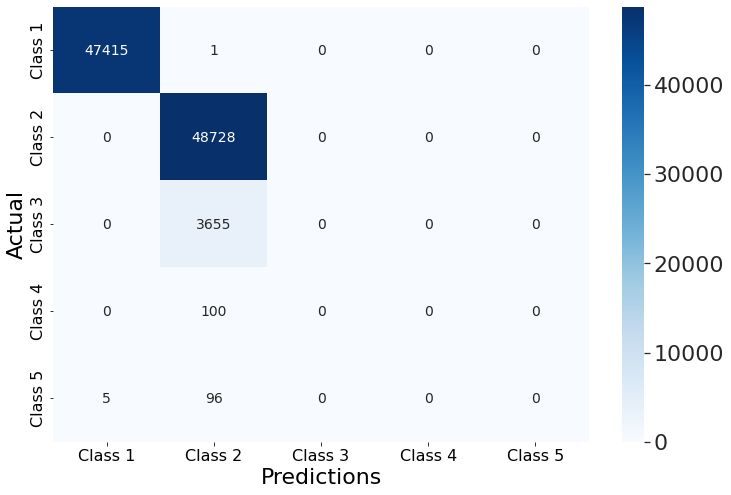

In [ ]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (12, 8))
target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5',]
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 2)
sn.heatmap(df_cm,annot=True,annot_kws={"size":14},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=22)
plt.ylabel('Actual',fontsize=22)
plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.savefig('SimpleRNN-ANN_ConfusionMatrix.png', dpi=300)
# from mlxtend.plotting import plot_confusion_matrix
# fig,ax = plot_confusion_matrix(conf_mat = mat,fontsize=20)
# plt.xlabel('Predictions',fontsize=18)
# plt.ylabel('Actual',fontsize=18)
# plt.show()

In [ ]:
from google.colab import files
files.download('SimpleRNN-ANN_ConfusionMatrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

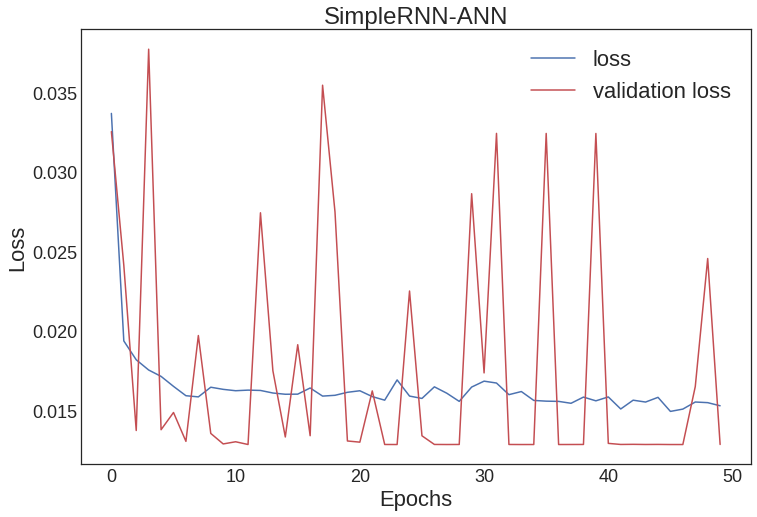

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
fig = plt.subplots(1,1, figsize = (12, 8))
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('SimpleRNN-ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
plt.savefig('SimpleRNN-ANN.png', dpi=300)

In [ ]:
from google.colab import files
files.download('SimpleRNN-ANN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC score: 0.6924755098884698


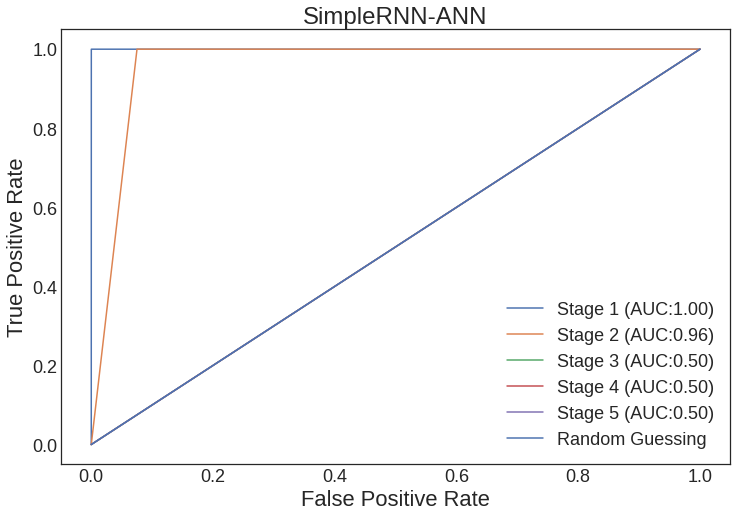

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('SimpleRNN-ANN',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('SimpleRNN-ANN_AUC.png', dpi=300)
plt.show()


In [ ]:
from google.colab import files
files.download('SimpleRNN-ANN_AUC.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import matplotlib.pyplot as plt 
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# #plt.style.use('seaborn-white')

# target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# # set plot figure size
# fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# # function for scoring roc auc score for multi-class
# def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_classes_1)
#     y_test = lb.transform(y_classes_1)
#     y_pred = lb.transform(y_classes)

#     for (idx, c_label) in enumerate(target):
#         fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
#         c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
#     c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
#     return roc_auc_score(y_test, y_pred, average=average)
# print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
# c_ax.legend(fontsize=18,)
# #c_ax.legend()
# c_ax.set_xlabel('False Positive Rate',)
# c_ax.set_ylabel('True Positive rate')
# plt.show()



In [ ]:
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D

# def evaluate_model_LSTM(X_train, X_val, y_train, y_val):
#   model = LSTM
#   timesteps=125
#   dims=4
#   model=Sequential()
#   model.add(LSTM(24,
#   dropout=0.2,return_sequences=True,
#   activation='tanh', recurrent_activation='tanh',recurrent_dropout=0.2,input_shape=(X_train.shape[1],1)))
#   model.add(LSTM(12, 
#   activation='tanh', recurrent_activation='tanh',
#   dropout=0.2,recurrent_dropout=0.2))
#   model.add(keras.layers.Dense (64,activation='relu')) #input layer
#   model.add(Dropout(0.2))
#   model.add(keras.layers.Dense (32,activation='relu')) #hidden
#   model.add(Dropout(0.3))
#   model.add(keras.layers.Dense (16,activation='relu')) #hidden
#   model.add(Dropout(0.3))
#   model.add(keras.layers.Dense (6,activation='softmax')) #output


#   epochs = 400
#   batch_size = 64
#   model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
#   model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=100, batch_size=128, verbose=1)
#   val_acc = model.evaluate(X_val, y_val, verbose = 1)
#   return model, val_acc

# #model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# # model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(MaxPooling1D(pool_size=2))
# # model.add(Flatten())

In [ ]:
# n_folds = 1
# cv_scores, model_history = list(), list()
# for _ in range(n_folds):  
#   # split data
#   # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
#   # evaluate model
#   print(X_train.shape)
#   print(y_train.shape)
#   print(X_test.shape)
#   print(y_test.shape)
#   model = tf.keras.Sequential()
#   model, test_acc = evaluate_model_LSTM(X_train, X_test, y_train, y_test)
# # list all data in history
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])